## Tugas Individu
### Rachmaddinta Hepradipto A
### Pandas-cookbook

In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
matplotlib.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

## Chapter 2 - Selecting data & finding the most common complaint type

In [2]:
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/311-service-requests.csv'
complaints = pd.read_csv(url)

C:\Users\herpr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2.1 What's even in it? (the summary)

In [3]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

### 2.2 Selecting columns and rows

In [4]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

In [5]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [7]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

### 2.3 Selecting multiple columns

In [8]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [9]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


### 2.4 What's the most common complaint type?

In [10]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Consumer Complaint                

In [11]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

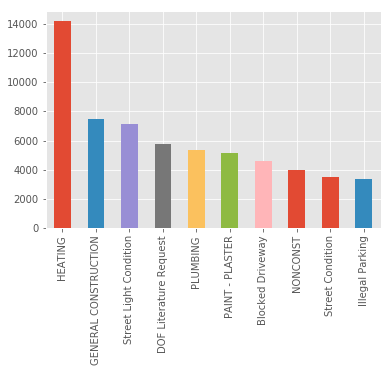

In [12]:
complaint_counts[:10].plot(kind='bar')

## Chapter 3 - Which borough has the most noise complaints (or, more selecting data)

### 3.1 Selecting only noise complaints

In [13]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [14]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


In [15]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Le

In [16]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895.0,171051.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144.0,173511.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


In [17]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


### 3.2 A digression about numpy arrays

In [18]:
import numpy as np

In [19]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [20]:
np.array([1,2,3])

array([1, 2, 3])

In [21]:
pd.Series([1,2,3]).values

array([1, 2, 3], dtype=int64)

In [22]:
arr = np.array([1,2,3])

In [23]:
arr != 2

array([ True, False,  True])

In [24]:
arr[arr != 2]

array([1, 3])

### 3.3 So, which borough has the most noise complaints? 

In [25]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [26]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [27]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

In [28]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

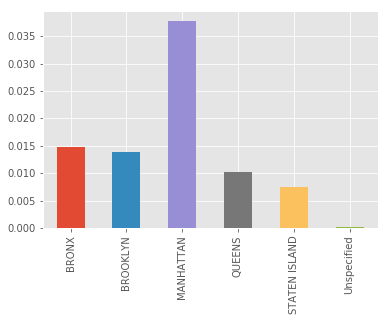

In [29]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

## Chapter 4 - Find out on which weekday people bike the most with groupby and aggregate

### 4.1 Adding a 'weekday' column to our dataframe

In [30]:
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv'
bikes = pd.read_csv(url, sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [31]:
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


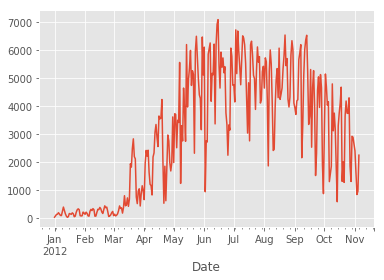

In [32]:
bikes['Berri 1'].plot()

In [33]:
berri_bikes = bikes[['Berri 1']].copy()

In [34]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [35]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [36]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

In [37]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

In [38]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


### 4.2 Adding up the cyclists by weekday

In [39]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [40]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


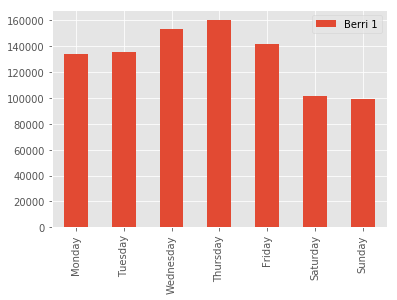

In [41]:
weekday_counts.plot(kind='bar')

###  4.3 Putting it together

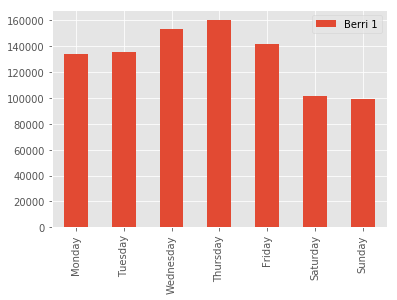

In [42]:
bikes = bikes.copy()
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

## Chapter 5 - Combining dataframes and scraping Canadian weather data

### Summary

In [43]:
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/weather_2012.csv'
weather_2012_final = pd.read_csv(url, index_col='Date/Time')

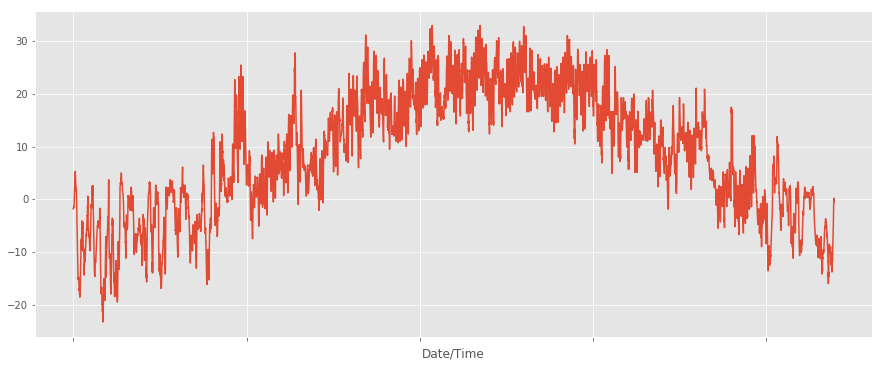

In [44]:
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

### 5.1 Downloading one month of weather data

In [45]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

In [46]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

# Error kemungkinan web page dipindahkan atau dihapus

HTTPError: HTTP Error 404: Not Found

In [47]:
weather_2012_final

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


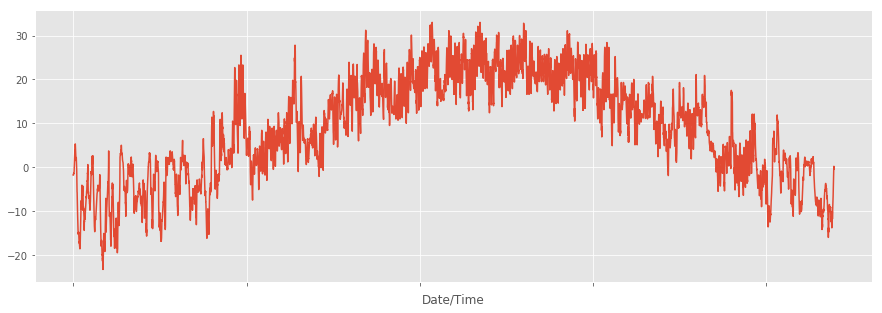

In [48]:
weather_2012_final[u"Temp (C)"].plot(figsize=(15, 5))

### 5.2 Plotting the temperature by hour of day

In [49]:
temperatures = weather_2012_final[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_2012_final.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

<bound method NDFrame.head of                      Temp (C)
Date/Time                    
2012-01-01 00:00:00      -1.8
2012-01-01 01:00:00      -1.8
2012-01-01 02:00:00      -1.8
2012-01-01 03:00:00      -1.5
2012-01-01 04:00:00      -1.5
2012-01-01 05:00:00      -1.4
2012-01-01 06:00:00      -1.5
2012-01-01 07:00:00      -1.4
2012-01-01 08:00:00      -1.4
2012-01-01 09:00:00      -1.3
2012-01-01 10:00:00      -1.0
2012-01-01 11:00:00      -0.5
2012-01-01 12:00:00      -0.2
2012-01-01 13:00:00       0.2
2012-01-01 14:00:00       0.8
2012-01-01 15:00:00       1.8
2012-01-01 16:00:00       2.6
2012-01-01 17:00:00       3.0
2012-01-01 18:00:00       3.8
2012-01-01 19:00:00       3.1
2012-01-01 20:00:00       3.2
2012-01-01 21:00:00       4.0
2012-01-01 22:00:00       4.4
2012-01-01 23:00:00       5.3
2012-01-02 00:00:00       5.2
2012-01-02 01:00:00       4.6
2012-01-02 02:00:00       3.9
2012-01-02 03:00:00       3.7
2012-01-02 04:00:00       2.9
2012-01-02 05:00:00       2.6
...       

AttributeError: 'Index' object has no attribute 'hour'

### 5.3 Getting the whole year of data

In [50]:
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

In [51]:
download_weather_month(2012, 1)[:5]

HTTPError: HTTP Error 404: Not Found

In [53]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

HTTPError: HTTP Error 404: Not Found

In [54]:
weather_2012 = pd.concat(data_by_month)
weather_2012

NameError: name 'data_by_month' is not defined

In [68]:
weather_2012_final.to_csv('D:/Datasets/weather_2012.csv')

## Chapter 6 - String Operations- Which month was the snowiest

In [55]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [56]:
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/weather_2012.csv'
weather_2012 = pd.read_csv(url, parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 6.1 String operations

In [57]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

In [58]:
# Not super useful
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

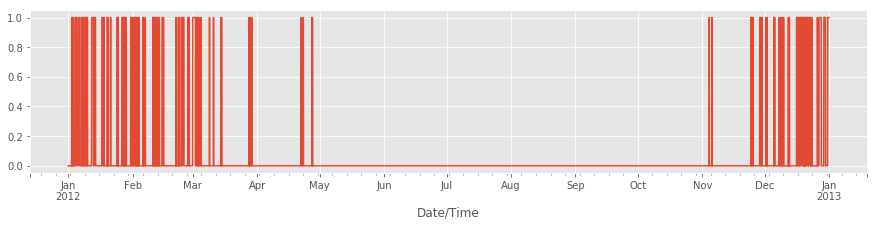

In [59]:
# More useful!
is_snowing.astype(float).plot()

### 6.2 Use resampling to find the snowiest month

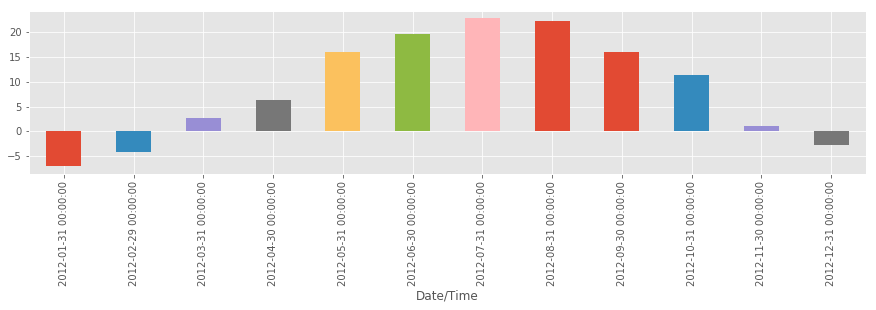

In [60]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

In [61]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

In [62]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

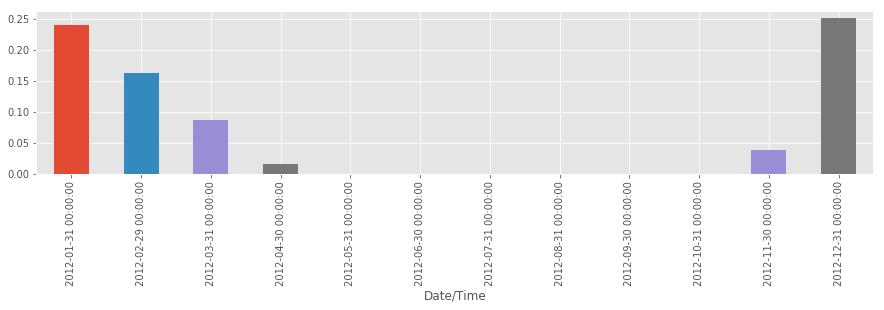

In [63]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

### 6.3 Plotting temperature and snowiness stats together

In [64]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

In [65]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


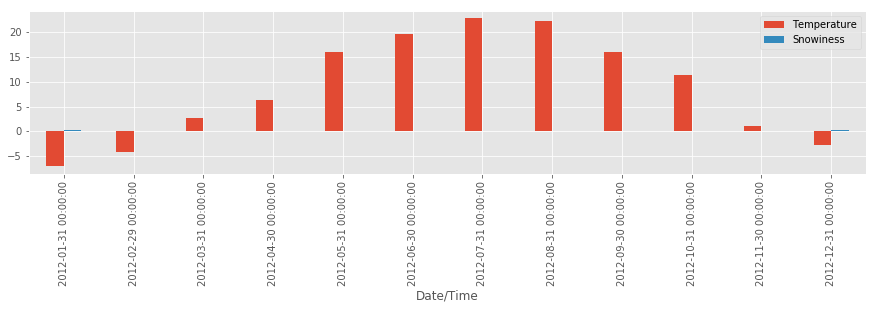

In [66]:
stats.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1AC980588>,
      dtype=object)

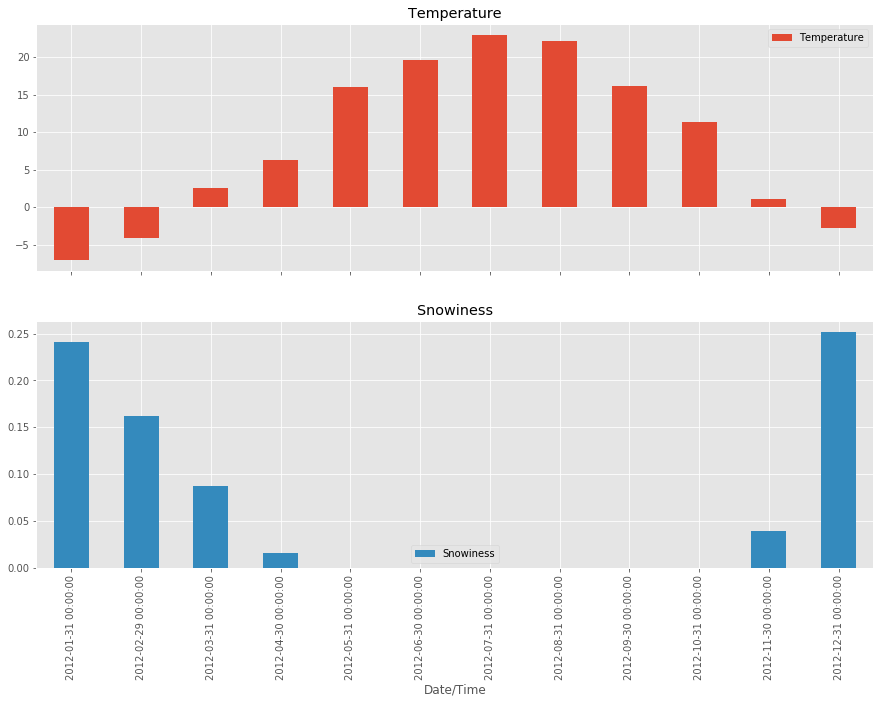

In [67]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

## Chapter 7 - Cleaning up messy data

In [68]:
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/311-service-requests.csv'
requests = pd.read_csv(url)

C:\Users\herpr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 7.1 How do we know if it's messy?

In [69]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

### 7.2 Fixing the nan values and string/float confusion

In [70]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv(url, na_values=na_values, dtype={'Incident Zip': str})

In [71]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

### 7.3 What's up with the dashes?

In [72]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

In [73]:
requests[rows_with_dashes]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
29136,26550551,10/24/2013 06:16:34 PM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,77092-2016,2700 EAST SELTICE WAY,EAST SELTICE WAY,NaN,NaN,NaN,NaN,NaN,HOUSTON,NaN,NaN,Assigned,11/13/2013 11:15:20 AM,10/29/2013 11:16:16 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30939,26548831,10/24/2013 09:35:10 AM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,55164-0737,P.O. BOX 64437,64437,NaN,NaN,NaN,NaN,NaN,ST. PAUL,NaN,NaN,Assigned,11/13/2013 02:30:21 PM,10/29/2013 02:31:06 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70539,26488417,10/15/2013 03:40:33 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11549-3650,365 HOFSTRA UNIVERSITY,HOFSTRA UNIVERSITY,NaN,NaN,NaN,NaN,NaN,HEMSTEAD,NaN,NaN,Assigned,11/30/2013 01:20:33 PM,10/16/2013 01:21:39 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85821,26468296,10/10/2013 12:36:43 PM,10/26/2013 01:07:07 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Debt Not Owed,NaN,29616-0759,PO BOX 25759,BOX 25759,NaN,NaN,NaN,NaN,NaN,GREENVILLE,NaN,NaN,Closed,10/26/2013 09:20:28 AM,10/26/2013 01:07:07 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89304,26461137,10/09/2013 05:23:46 PM,10/25/2013 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,35209-3114,600 BEACON PKWY,BEACON PKWY,NaN,NaN,NaN,NaN,NaN,BIRMINGHAM,NaN,NaN,Closed,10/25/2013 02:43:42 PM,10/25/2013 01:06:41 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [75]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

In [76]:
requests[requests['Incident Zip'] == '00000']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,EWR,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/07/2013 09:53:51 AM,10/23/2013 09:54:43 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,NEWARK AIRPORT,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/02/2013 11:59:46 AM,10/18/2013 12:01:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan

In [78]:
unique_zips = requests['Incident Zip'].unique()
unique_zips.astype(float).sort()
unique_zips

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [79]:
zips = requests['Incident Zip']
# Let's say the zips starting with '0' and '1' are okay, for now. (this isn't actually true -- 13221 is in Syracuse, and why?)
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# There are a bunch of NaNs, but we're not interested in them right now, so we'll say they're False
is_far = ~(is_close) & zips.notnull()

In [80]:
zips[is_far]

12102    77056
13450    70711
29136    77092
30939    55164
44008    90010
47048    23541
57636    92123
71001    92123
71834    23502
80573    61702
85821    29616
89304    35209
94201    41042
Name: Incident Zip, dtype: object

In [81]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort_values('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616,Debt Not Owed,GREENVILLE
89304,35209,Harassment,BIRMINGHAM
94201,41042,Harassment,FLORENCE
30939,55164,Harassment,ST. PAUL
80573,61702,Billing Dispute,BLOOMIGTON
13450,70711,Contract Dispute,CLIFTON
12102,77056,Debt Not Owed,HOUSTON
29136,77092,False Advertising,HOUSTON


In [82]:
requests['City'].str.upper().value_counts()

BROOKLYN                  31662
NEW YORK                  22664
BRONX                     18438
STATEN ISLAND              4766
JAMAICA                    2246
FLUSHING                   1803
ASTORIA                    1568
RIDGEWOOD                  1073
CORONA                      707
OZONE PARK                  693
LONG ISLAND CITY            678
FAR ROCKAWAY                652
ELMHURST                    647
WOODSIDE                    609
EAST ELMHURST               562
QUEENS VILLAGE              549
FOREST HILLS                541
JACKSON HEIGHTS             541
SOUTH RICHMOND HILL         521
MASPETH                     473
WOODHAVEN                   464
FRESH MEADOWS               435
SPRINGFIELD GARDENS         434
BAYSIDE                     411
SOUTH OZONE PARK            410
RICHMOND HILL               404
REGO PARK                   402
MIDDLE VILLAGE              396
SAINT ALBANS                387
WHITESTONE                  348
                          ...  
NEW YOR 

### 7.4 Putting it together

In [84]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv(url, 
                       na_values=na_values, 
                       dtype={'Incident Zip': str})

In [85]:
def fix_zip_codes(zips):
    # Truncate everything to length 5 
    zips = zips.str.slice(0, 5)
    
    # Set 00000 zip codes to nan
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [86]:
requests['Incident Zip'] = fix_zip_codes(requests['Incident Zip'])

In [87]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

## Chapter 8 - How to deal with timestamps

### 8.1 Parsing Unix timestamps

In [88]:
# Read it, and remove the last row
url = 'https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/popularity-contest'
popcon = pd.read_csv(url, sep=' ', )[:-1]
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']

In [89]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [90]:
popcon['atime'] = popcon['atime'].astype(int)
popcon['ctime'] = popcon['ctime'].astype(int)

In [91]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit='s')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit='s')

In [92]:
popcon['atime'].dtype

dtype('<M8[ns]')

In [94]:
popcon[:5]

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [98]:
popcon = popcon[popcon['atime'] > '1970-01-01']

In [100]:
nonlibraries  = popcon[~popcon['package-name'].str.contains('lib')]

In [101]:
nonlibraries.sort_values('ctime', ascending=False)[:10]

,atime,ctime,package-name,mru-program,tag
57,2013-12-17 04:55:39,2013-12-17 04:55:42,ddd,/usr/bin/ddd,<RECENT-CTIME>
450,2013-12-16 20:03:20,2013-12-16 20:05:13,nodejs,/usr/bin/npm,<RECENT-CTIME>
454,2013-12-16 20:03:20,2013-12-16 20:05:04,switchboard-plug-keyboard,/usr/lib/plugs/pantheon/keyboard/options.txt,<RECENT-CTIME>
445,2013-12-16 20:03:20,2013-12-16 20:05:04,thunderbird-locale-en,/usr/lib/thunderbird-addons/extensions/langpac...,<RECENT-CTIME>
396,2013-12-16 20:08:27,2013-12-16 20:05:03,software-center,/usr/sbin/update-software-center,<RECENT-CTIME>
449,2013-12-16 20:03:20,2013-12-16 20:05:00,samba-common-bin,/usr/bin/net.samba3,<RECENT-CTIME>
397,2013-12-16 20:08:25,2013-12-16 20:04:59,postgresql-client-9.1,/usr/lib/postgresql/9.1/bin/psql,<RECENT-CTIME>
398,2013-12-16 20:08:23,2013-12-16 20:04:58,postgresql-9.1,/usr/lib/postgresql/9.1/bin/postmaster,<RECENT-CTIME>
452,2013-12-16 20:03:20,2013-12-16 20:04:55,php5-dev,/usr/include/php5/main/snprintf.h,<RECENT-CTIME>
440,2013-12-16 20:03:20,2013-12-16 20:04:54,php-pear,/usr/share/php/XML/Util.php,<RECENT-CTIME>


## Chapter 9 - Loading data from SQL databases

### 9.1 Reading data from SQL databases

In [103]:
import sqlite3

In [104]:
# weather_2012.sqlite
con = sqlite3.connect("D:/Datasets/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8


In [105]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, index_col='id')
df

,date_time,temp
id,,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


In [106]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, 
                 index_col=['id', 'date_time'])
df

,,temp
id,date_time,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


### 9.2 Writing to a SQLite database

In [108]:
weather_df = pd.read_csv('D:/Datasets/weather_2012.csv')
con = sqlite3.connect("D:/Datasets/test_db.sqlite")
con.execute("DROP TABLE IF EXISTS weather_2012")
weather_df.to_sql("weather_2012", con)

In [110]:
con = sqlite3.connect("D:/Datasets/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [111]:
con = sqlite3.connect("D:/Datasets/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 ORDER BY Weather LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
1,114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2,115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear


### 9.3 Connecting to other kinds of database

In [112]:
# import MySQLdb con = MySQLdb.connect(host="localhost", db="test")
# import psycopg2 con = psycopg2.connect(host="localhost")